In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%pip install --upgrade tiktoken
import tiktoken

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Gets token encoding for ChatGPT
encoding = tiktoken.get_encoding("cl100k_base")

In [4]:
#Testing tokenization
print(encoding.encode("Testing tiktoken"))
num_tokens = len(encoding.encode("Testing tiktoken"))
print(num_tokens)

[16856, 87272, 5963]
3


In [5]:
#Importing testing data
fullData = pd.read_csv("GPT-wiki-intro.csv")
gptData = fullData["generated_intro"]
humanData = fullData["wiki_intro"]

In [6]:
def separate_sentences(data_df):
    sentences = []
    for response in data_df:
        sentences.append(response.split('.'))
    return sentences

In [7]:
separate_sentences(gptData)

[['Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England',
  ' The station was opened by the Lancashire and Yorkshire Railway on 7 October 1870',
  ' It was closed to passengers on 5 January 1950, and to goods on 12 May 1965',
  ' \n\nThe station building is now a private residence',
  ' There is a small amount of trackage remaining near the building, used currently by a local agricultural business',
  ''],
 ['In Finnish folklore, all places and things, animate or inanimate, have a spirit or "etiäinen" that lives there',
  ' Etiäinen can manifest in many forms, but is usually described as a kind, elderly woman with white hair',
  ' She is the guardian of natural places and often helps people in need',
  ' \n\nEtiäinen has been a part of Finnish culture for centuries and is still widely believed in today',
  ' Folklorists study etiäinen to understand Finnish traditions and how they have changed over time',
  ''],
 ['

In [9]:
separate_sentences(gptData)[0][0]

'Sexhow railway station was a railway station located in the town of Sexhow, on the Cumbrian Coast Line in North West England'

In [30]:
#Get number of tokens for each sentence
def tokens_per_sentence(sentences):
    result = []
    counter = 0
    for i in sentences:
        holder = []
        for sentence in sentences:
            tokens = encoding.encode(sentence[0])
            #print(len(tokens))
            holder.append(len(tokens))
        result.append(holder)
        counter += 1
        print(counter)
        if counter > 5:
            return result

    return result

In [31]:
tokens_per_sentence(separate_sentences(gptData))

1
2
3
4
5
6


[[27,
  26,
  32,
  16,
  9,
  23,
  20,
  36,
  30,
  18,
  26,
  23,
  20,
  25,
  17,
  41,
  23,
  15,
  21,
  26,
  11,
  29,
  27,
  16,
  25,
  33,
  14,
  17,
  31,
  22,
  19,
  10,
  42,
  23,
  31,
  23,
  44,
  17,
  30,
  20,
  21,
  20,
  45,
  32,
  33,
  41,
  9,
  18,
  30,
  31,
  18,
  33,
  23,
  23,
  19,
  26,
  13,
  36,
  25,
  6,
  43,
  37,
  19,
  18,
  23,
  32,
  22,
  25,
  6,
  31,
  17,
  42,
  54,
  50,
  22,
  27,
  25,
  16,
  27,
  20,
  29,
  19,
  21,
  23,
  19,
  20,
  22,
  26,
  18,
  17,
  22,
  4,
  31,
  16,
  28,
  33,
  27,
  49,
  45,
  25,
  37,
  31,
  24,
  13,
  21,
  13,
  30,
  18,
  26,
  28,
  42,
  47,
  2,
  35,
  34,
  21,
  29,
  22,
  39,
  22,
  30,
  28,
  18,
  39,
  18,
  32,
  24,
  29,
  33,
  4,
  15,
  21,
  25,
  27,
  14,
  9,
  10,
  5,
  15,
  29,
  26,
  22,
  27,
  25,
  14,
  22,
  5,
  12,
  39,
  33,
  39,
  7,
  9,
  17,
  18,
  27,
  17,
  6,
  30,
  45,
  34,
  28,
  15,
  18,
  24,
  33,
  21,
  13,
  26,

## Tokenization is just too slow, going back to just finding the length of the sentences

In [36]:
def lengths_per_sentence(sentences):
    result = []
    counter = 0
    for i in sentences:
        holder = []
        for sentence in sentences:
            tokens = len(sentence[0])
            #print(len(tokens))
            holder.append(tokens)
        result.append(holder)
        counter += 1
        print(counter)
        if counter > 100:
            return result

    return result

In [38]:
lengths = lengths_per_sentence(separate_sentences(gptData))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


In [39]:
lengths

[[124,
  110,
  204,
  70,
  31,
  103,
  108,
  217,
  85,
  80,
  114,
  107,
  123,
  94,
  94,
  215,
  96,
  74,
  143,
  106,
  29,
  113,
  103,
  82,
  127,
  145,
  43,
  65,
  154,
  111,
  81,
  62,
  196,
  73,
  130,
  105,
  136,
  72,
  126,
  92,
  81,
  116,
  185,
  146,
  128,
  210,
  21,
  74,
  96,
  177,
  93,
  107,
  119,
  111,
  63,
  145,
  69,
  146,
  122,
  11,
  145,
  173,
  67,
  87,
  85,
  124,
  98,
  142,
  15,
  107,
  62,
  204,
  198,
  169,
  80,
  101,
  114,
  83,
  106,
  101,
  170,
  73,
  91,
  118,
  68,
  70,
  69,
  77,
  55,
  81,
  86,
  24,
  109,
  88,
  96,
  108,
  114,
  133,
  191,
  99,
  107,
  147,
  112,
  68,
  93,
  79,
  91,
  64,
  100,
  99,
  147,
  158,
  6,
  139,
  109,
  110,
  102,
  74,
  194,
  67,
  118,
  105,
  48,
  159,
  72,
  169,
  83,
  110,
  140,
  8,
  101,
  85,
  82,
  92,
  64,
  38,
  44,
  19,
  88,
  105,
  148,
  93,
  120,
  117,
  55,
  81,
  8,
  54,
  138,
  150,
  140,
  34,
  38,
  90,


In [42]:
def avg_sentence_length(sentence_lengths):
    averages = []
    for i in sentence_lengths:
        result = np.mean(i)
        averages.append(result)
    return averages



In [43]:
avg = avg_sentence_length(lengths)

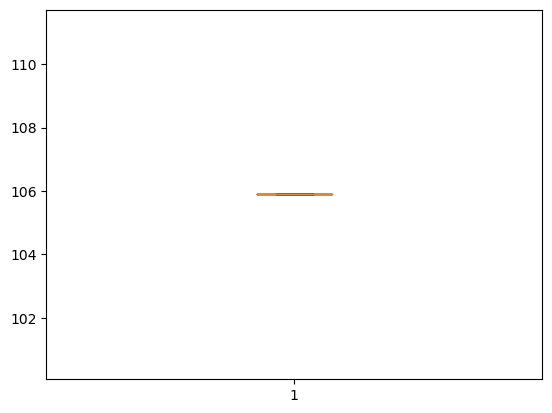

In [44]:
plt.boxplot(avg)
plt.show()

In [45]:
#Clean up all the other functions into one function
def better_average_sentence_length(data_df):
    a = separate_sentences(data_df)
    b = lengths_per_sentence(a)
    avg = avg_sentence_length(b)
    return avg

In [46]:
avg_gpt = better_average_sentence_length(gptData)
avg_human = better_average_sentence_length(humanData)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101


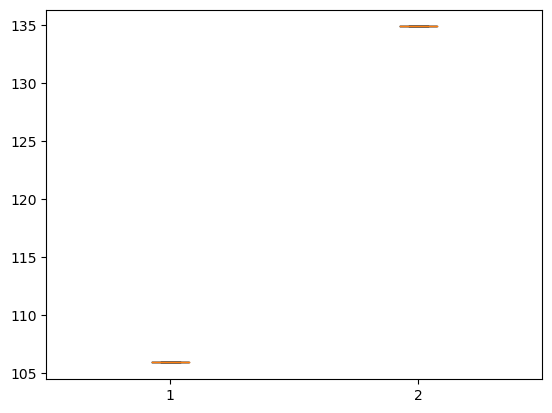

In [47]:
box_data = [avg_gpt, avg_human]
plt.boxplot(box_data)
plt.show()